### 統計學習與深度學習 (Fall, 2024)
### Homework 2

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。
如無其他規定，所有重要結果應顯示至小數點第四位(四捨五入)。本次作業禁止使用Auto-SKlearn或其他AutoML工具。題目可能有額外實做限制。違反規定者該題以零分計算。


### 第一題[Logistic Regression: Probability, Loss, Gradient, and Weights]

Logistic regression (LR) 是一個常用的分類模型。我們將在這個題目中透過練習熟悉一些LR的細節與特性。

本題將利用UCI的"Adult" dataset <https://archive.ics.uci.edu/ml/datasets/Adult>來練習資料前處理。我們使用這個資料集的方式是用來建構預測最後一個收入欄位是'>50K'或'<=50K'。這個資料集已經先切好了Training跟Test。Training又切分為Subtraining與Validation兩個不重疊的集合。

請直接使用作業附帶的資料檔 **adult_m50kv2.pickle**。讀取的方式為:

In [1]:
import pickle
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

這是一個Dictionary結構，Keys有:

In [2]:
adult50kp.keys()

dict_keys(['x_train', 'y_train', 'x_test', 'y_test', 'columnname', 'num_col', 'x_subtrain', 'x_subvalid', 'y_subtrain', 'y_subvalid', 'x_subtrain_ib', 'y_subtrain_ib'])

其中x_train與y_train為訓練資料，x_test與y_test為測試資料，columname為欄位名稱，
x_subtrain與y_subtrain為Subtraining, x_subvalid與y_subvalid為validation資料集。

本題的任務如下:

**第一小題** (10%): 實做一個pred_prob函數。這個函數的輸入為資料矩陣、LR的常數項係數與特徵係數，輸出在給定係數下LR對各資料點預測屬於各Class的機率。本題為Binary Classification, 因此第一個Column為Class 0, 第二個Column為Class 1的機率。一般而言，Class 1稱為Postive Class, Class 0 稱為Negative Class。本題>50K為Positive Class。本題禁止直接使用sklearn中的實做。你應該使用Numpy建構此函數。然而，你可以參考sklearn中對此函數的定義<https://scikit-learn.org/1.5/modules/linear_model.html#binary-case>。你的實做應與此文件一致。

請使用下面Python函數定義:

```python
def pred_prob(X, intercept, coefs, twocol = True):
    # Implement your own probability function to predict 
    # the probability in binary logistic regression

```

其中`X`為特徵矩陣，每一個row為一筆資料，不包含常數項。
`intercept`為LR的常數項係數。
`coefs`為 K X 1 的係數Numpy向量。
`twocol`為 Boolean。如True則回傳的機率矩陣為N X 2, 第一個Column為P(Y=0 | X) 第二個Column為P(Y=1 | X)。如False則回傳N X 1矩陣的P(Y=1 | X)。



In [3]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def pred_prob(X, intercept, coefs, twocol = True):
    # Implement your own probability function to predict 
    # the probability in binary logistic regression
    
    # calculate linear combination
    linear_combination = np.matmul(X, coefs) + intercept
    
    # predict class 1 probability
    probability_class1 = sigmoid(linear_combination)
    
    # if true return N X 2 else N X 1
    if twocol:
        probability_class0 = 1 - probability_class1
        return np.column_stack((probability_class0, probability_class1))
    else:
        return probability_class1.reshape(-1, 1)

In [4]:
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

X = adult50kp['x_subtrain'][0:5,]
intercept = -1.5272275
coefs = [0.25950781,  0.34876602,  2.31873776 , 0.78736064,  0.33992389,  0.08704992,
  -0.43884149,  0.06617491, -0.86784172, -1.14138298, -0.0430126,   0.89943298,
  -0.91920029,  0.11168262, -0.20330975, -0.45255335, -0.06209014, -1.1973518,
  -0.32811911,  0.15581135,  0.23931349,  0.97771987, -0.80849467, -0.48881008,
  -0.05761483, -0.61597391, -3.01467409,  0.67615709,  0.82684249,  0.45561501,
   0.78515056,  0.10471469,  0.03536166, -0.18042056, -0.1981496,   0.89739856,
   0.72133736,  0.19974049,  0.02431812, -0.54957554, -0.23797782, -0.19134163,
  -0.08962951, -0.13136345, -0.14984098, -1.82034863,  0.22178759, -0.07676697,
   1.5654472,   0.4801181,  -0.45519986, -2.16013255,  0.56715199, -1.36568413,
  -0.26013768, -0.34160994,  0.30455591,  0.98946547,  0.83849021, -0.55428539,
  -0.01931975,  0.02875685, -0.22012367,  0.165938,    0.24587743, -0.49584621,
   0.27129184,  0.6632467,   1.08311314,  0.355352,    0.23657114, -0.55244221,
  -0.29776791, -0.51492492, -1.08493494, -0.83233382,  0.61660701,  0.38077523,
   0.34522743,  0.10493796,  0.16957889, -0.91882431, -0.07844291, -0.12138313,
  -0.13627414,  0.437241,   -1.40284695,  0.43730002,  0.64656827, -0.12873123,
   0.12363191,  0.30820418, -0.37598606, -0.2384826,  -1.86067539, -0.92314978,
   2.17438484,  1.28232608, -1.05960696, -1.35676708, -0.99932736, -0.64333065]

coefs = np.array(coefs)
coefs = coefs.reshape((-1, 1))
pred_prob(X, intercept, coefs)

array([[0.85699649, 0.14300351],
       [0.84396404, 0.15603596],
       [0.54792834, 0.45207166],
       [0.99604068, 0.00395932],
       [0.91956486, 0.08043514]])

Output:
```
array([[0.85699649, 0.14300351],
       [0.84396404, 0.15603596],
       [0.54792834, 0.45207166],
       [0.99604068, 0.00395932],
       [0.91956486, 0.08043514]])
```

**第二小題** (15%): 實做LR with L2 Regularization的Loss Function。

此Loss Function的定義如下

$\frac{1}{S} \sum_{i=1}^{n} -s_i(y_i log(p(X_i) + (1 - y_i) log(1 - p(X_i)) + \frac{1}{2} \frac{w^T w}{S \cdot  C}  $

其中$P(X_i)$為LR在目前參數下預測資料點$i$為Positive Class的機率。
$w$為參數向量(不包含常數項係數)。
$s_i$為資料點$i$的全重，$s_i = 1$。
$S = \sum_{i=1}^N s_i$。
$C$ 為Regularization Coefficient，數值越大則對係數的牽制越小(與課程投影片定義不同)。

本題禁止直接使用sklearn中的實做。你應該使用Numpy建構此函數。然而，你可以參考sklearn中對此函數的定義<https://scikit-learn.org/1.5/modules/linear_model.html#binary-case>。你的實做應與此文件一致。

請使用下面Python函數定義:

```python
def lr_logloss(Xtrain, ytrain, intercept, coefs, C):
    # Implement your own loss function for
    # Logistic Regression with L2 regularization
    
```

其中`Xtrain`為特徵矩陣，每一個row為一筆資料，不包含常數項。
`ytrain`為class label, 數值應為0或1。
`intercept`為LR的常數項係數。
`coefs`為 K X 1 的係數Numpy向量。
`C`為regularization coefficient。

In [5]:
def lr_logloss(Xtrain, ytrain, intercept, coefs, C):
    # Number of data
    n = Xtrain.shape[0]
    
    # probability of class1
    probability_class1 = pred_prob(Xtrain, intercept, coefs, twocol=False)
    
    # loss calculation
    ytrain = ytrain.reshape(1, -1)
    
    first = -np.matmul(ytrain, np.log(probability_class1))
    second = -np.matmul((1 - ytrain), np.log(1 - probability_class1))
    third = (1 / (2 * n * 1000)) * np.sum(np.square(coefs))
    
    add = (first[0][0] + second[0][0])/n + third
    
    return add

In [6]:
Xtrain = adult50kp['x_subtrain']
ytrain = adult50kp['y_subtrain']
lr_logloss(Xtrain, ytrain, intercept, coefs, 1000)

0.32275140356935755

Output:
```
0.32275140356935755
```

**第三小題** (10%): 

(1) 使用 sklearn.linear_model.LogisticRegression()與Sub-training 資料集學習LR參數，印出Intercept與各特徵名稱與係數。(2) 將學好的模型應用在Test Dataset，計算Accuracy, Recall, Precision, F1。可使用sklearn實做。務必在最後具體說明題目所要計算的數值。請勿只印出sklearn的output。

In [34]:
print(adult50kp["x_subtrain"].shape, adult50kp["y_subtrain"].shape, 
      adult50kp['x_test'].shape, adult50kp['y_test'].shape, adult50kp['columnname'].shape)

(27000, 102) (27000,) (15060, 102) (15060,) (102,)


In [49]:
from sklearn import linear_model 
from sklearn import metrics 

# Extract subtrain and test data
x_subtrain = adult50kp['x_subtrain']
y_subtrain = adult50kp['y_subtrain']
x_test = adult50kp['x_test']
y_test = adult50kp['y_test']
column_names = adult50kp['columnname']

# fit the logistic regression model
model = linear_model.LogisticRegression()
model.fit(x_subtrain, y_subtrain)

# Print the intercept and coefficients
print("Intercept:", f"{model.intercept_[0]:.4f}")
for name, coef in zip(column_names, model.coef_[0]):
    print(f"{name}: {coef:.4f}")

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print(metrics.classification_report(y_test, y_pred, digits=4))
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Intercept: -1.8371
capital-loss: 0.2556
hours-per-week: 0.3536
capital-gain: 2.3599
educational-num: 0.7231
age: 0.3383
fnlwgt: 0.0806
relationship_Husband: -0.1960
relationship_Not-in-family: 0.0199
relationship_Other-relative: -0.7290
relationship_Own-child: -1.0842
relationship_Unmarried: -0.0838
relationship_Wife: 1.1587
race_Amer-Indian-Eskimo: -0.5726
race_Asian-Pac-Islander: 0.1929
race_Black: -0.1544
race_Other: -0.3812
race_White: 0.0010
gender_Female: -0.9116
gender_Male: -0.0028
occupation_Adm-clerical: 0.0864
occupation_Craft-repair: 0.1245
occupation_Exec-managerial: 0.8988
occupation_Farming-fishing: -0.9024
occupation_Handlers-cleaners: -0.5791
occupation_Machine-op-inspct: -0.2010
occupation_Other-service: -0.7317
occupation_Priv-house-serv: -1.6044
occupation_Prof-specialty: 0.5924
occupation_Protective-serv: 0.5983
occupation_Sales: 0.3897
occupation_Tech-support: 0.7701
occupation_Transport-moving: 0.0096
education_10th: -0.0451
education_11th: -0.1529
education_12th

C:\Users\jackyfirst\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. 使用 sklearn.linear_model.LogisticRegression()與Sub-training 資料集學習LR參數，印出Intercept與各特徵名稱與係數

```
Intercept: -1.8371
capital-loss: 0.2556
hours-per-week: 0.3536
capital-gain: 2.3599
educational-num: 0.7231
age: 0.3383
fnlwgt: 0.0806
relationship_Husband: -0.1960
relationship_Not-in-family: 0.0199
relationship_Other-relative: -0.7290
relationship_Own-child: -1.0842
relationship_Unmarried: -0.0838
relationship_Wife: 1.1587
race_Amer-Indian-Eskimo: -0.5726
race_Asian-Pac-Islander: 0.1929
race_Black: -0.1544
race_Other: -0.3812
race_White: 0.0010
gender_Female: -0.9116
gender_Male: -0.0028
occupation_Adm-clerical: 0.0864
occupation_Craft-repair: 0.1245
occupation_Exec-managerial: 0.8988
occupation_Farming-fishing: -0.9024
occupation_Handlers-cleaners: -0.5791
occupation_Machine-op-inspct: -0.2010
occupation_Other-service: -0.7317
occupation_Priv-house-serv: -1.6044
occupation_Prof-specialty: 0.5924
occupation_Protective-serv: 0.5983
occupation_Sales: 0.3897
occupation_Tech-support: 0.7701
occupation_Transport-moving: 0.0096
education_10th: -0.0451
education_11th: -0.1529
education_12th: -0.0938
education_1st-4th: 0.6795
education_5th-6th: 0.2840
education_7th-8th: -0.1149
education_9th: 0.0598
education_Assoc-acdm: -0.4813
education_Assoc-voc: -0.1500
education_Bachelors: -0.1666
education_Doctorate: 0.1220
education_HS-grad: -0.1201
education_Masters: -0.0550
education_Preschool: -0.8506
education_Prof-school: 0.2531
education_Some-college: -0.0826
native-country_Cambodia: 0.9556
native-country_Canada: 0.3266
native-country_China: -0.3942
native-country_Columbia: -1.3114
native-country_Cuba: 0.4128
native-country_Dominican-Republic: -0.9209
native-country_Ecuador: -0.2784
native-country_El-Salvador: -0.3058
native-country_England: 0.4698
native-country_France: 0.5947
native-country_Germany: 0.5306
native-country_Greece: -0.4588
native-country_Guatemala: -0.0691
native-country_Haiti: 0.5454
native-country_Honduras: -0.1033
native-country_Hong: -0.0947
native-country_Hungary: 0.2897
native-country_India: -0.4167
native-country_Iran: 0.1559
native-country_Ireland: 0.4421
native-country_Italy: 0.8434
native-country_Jamaica: 0.2266
native-country_Japan: 0.3955
native-country_Laos: 0.0376
native-country_Mexico: -0.3498
native-country_Nicaragua: -0.2068
native-country_Outlying-US(Guam-USVI-etc): -0.5582
native-country_Peru: -0.3916
native-country_Philippines: 0.3930
native-country_Poland: 0.0616
native-country_Portugal: -0.2223
native-country_Puerto-Rico: -0.2580
native-country_Scotland: 0.0933
native-country_South: -0.9575
native-country_Taiwan: -0.1444
native-country_Thailand: -0.3098
native-country_Trinadad&Tobago: -0.0464
native-country_United-States: 0.3432
native-country_Vietnam: -0.7186
native-country_Yugoslavia: 0.4957
workclass_Federal-gov: 0.5466
workclass_Local-gov: -0.0825
workclass_Private: 0.0661
workclass_Self-emp-inc: 0.2223
workclass_Self-emp-not-inc: -0.4385
workclass_State-gov: -0.2705
workclass_Without-pay: -0.9579
marital-status_Divorced: -0.6434
marital-status_Married-AF-spouse: 1.5515
marital-status_Married-civ-spouse: 1.2039
marital-status_Married-spouse-absent: -0.6372
marital-status_Never-married: -1.1612
marital-status_Separated: -0.7614
marital-status_Widowed: -0.4666
```

2. 將學好的模型應用在Test Dataset，計算Accuracy, Recall, Precision, F1

```
Accuracy: 0.8480

for the positive cases:
Recall: 0.6057
Precision: 0.7297
F1 Score: 0.6619
```

**第四小題** (10%): Loss function visualization。

基於前一小題學習出的係數，(1) 畫出在目前Intercept 附近一單位的Loss Function (2) 畫出在目前係數零(capital-loss)附近一單位的Loss Function。

注意: 由於前一個小題學習出的係數已經對Loss Function最小化，你畫出的圖應該都是U形曲線。


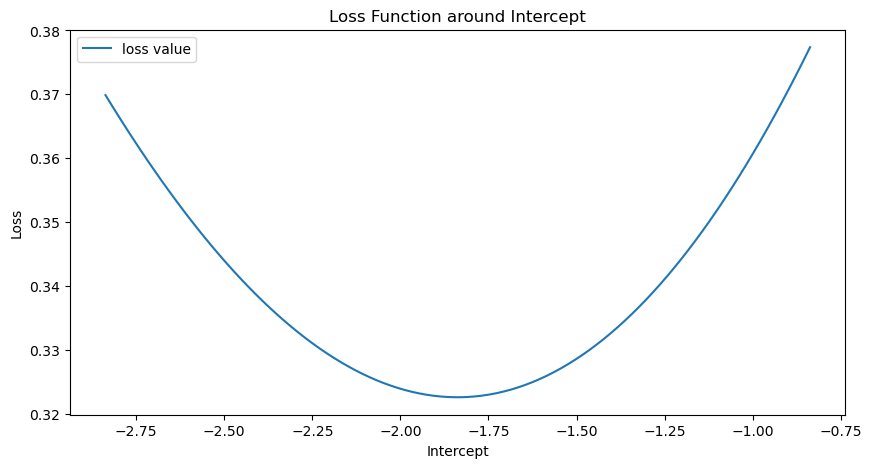

In [115]:
import matplotlib.pyplot as plt

intercept = model.intercept_[0]

# Loss function visualization around the intercept
intercept_range = np.linspace(intercept - 1, intercept + 1, 100)
loss_around_intercept = [lr_logloss(x_subtrain, y_subtrain, i, model.coef_[0], 1000) for i in intercept_range]

plt.figure(figsize=(10, 5))
plt.plot(intercept_range, loss_around_intercept, label='loss value')
plt.xlabel('Intercept')
plt.ylabel('Loss')
plt.title('Loss Function around Intercept')
plt.legend()
plt.show()

In [116]:
reshaped_model_coef = model.coef_.reshape(102, 1)
print(coefs.shape, model.coef_.shape, reshaped_model_coef.shape, reshaped_model_coef[0])

(102, 1) (1, 102) (102, 1) [0.25563315]


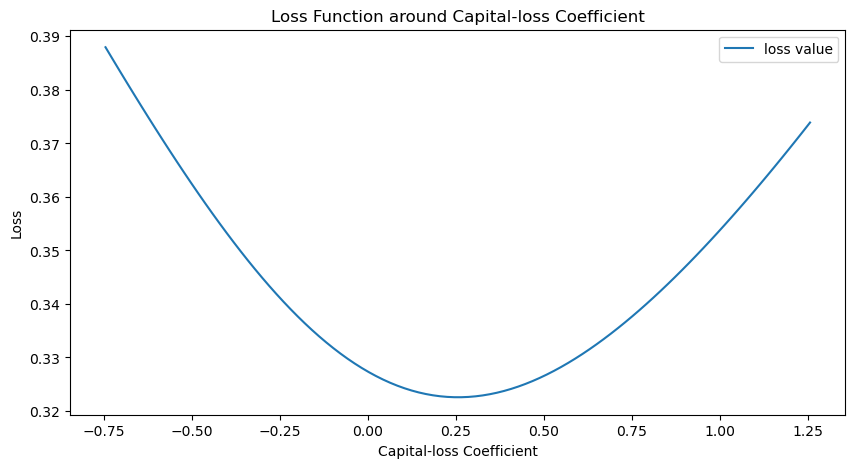

In [117]:
# Loss function visualization around the capital-loss
capital_loss_coef = reshaped_model_coef[0]
coef_range = np.linspace(capital_loss_coef - 1, capital_loss_coef + 1, 100)

loss_values_coef = []
for coef in coef_range:
    temp_coefs = reshaped_model_coef.copy()
    temp_coefs[0] = coef
    loss_values_coef.append(lr_logloss(x_subtrain, y_subtrain, intercept, temp_coefs, 1000))


plt.figure(figsize=(10, 5))
plt.plot(coef_range, loss_values_coef, label='loss value')
plt.xlabel('Capital-loss Coefficient')
plt.ylabel('Loss')
plt.title('Loss Function around Capital-loss Coefficient')
plt.legend()
plt.show()

#### Sanity Check

為了幫助同學們自我檢測正確性，在這裡提供幾個關鍵步驟的參考結果。

**第一小題**
```python
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

X = adult50kp['x_subtrain'][0:5,]
intercept = -1.5272275
coefs = [0.25950781,  0.34876602,  2.31873776 , 0.78736064,  0.33992389,  0.08704992,
  -0.43884149,  0.06617491, -0.86784172, -1.14138298, -0.0430126,   0.89943298,
  -0.91920029,  0.11168262, -0.20330975, -0.45255335, -0.06209014, -1.1973518,
  -0.32811911,  0.15581135,  0.23931349,  0.97771987, -0.80849467, -0.48881008,
  -0.05761483, -0.61597391, -3.01467409,  0.67615709,  0.82684249,  0.45561501,
   0.78515056,  0.10471469,  0.03536166, -0.18042056, -0.1981496,   0.89739856,
   0.72133736,  0.19974049,  0.02431812, -0.54957554, -0.23797782, -0.19134163,
  -0.08962951, -0.13136345, -0.14984098, -1.82034863,  0.22178759, -0.07676697,
   1.5654472,   0.4801181,  -0.45519986, -2.16013255,  0.56715199, -1.36568413,
  -0.26013768, -0.34160994,  0.30455591,  0.98946547,  0.83849021, -0.55428539,
  -0.01931975,  0.02875685, -0.22012367,  0.165938,    0.24587743, -0.49584621,
   0.27129184,  0.6632467,   1.08311314,  0.355352,    0.23657114, -0.55244221,
  -0.29776791, -0.51492492, -1.08493494, -0.83233382,  0.61660701,  0.38077523,
   0.34522743,  0.10493796,  0.16957889, -0.91882431, -0.07844291, -0.12138313,
  -0.13627414,  0.437241,   -1.40284695,  0.43730002,  0.64656827, -0.12873123,
   0.12363191,  0.30820418, -0.37598606, -0.2384826,  -1.86067539, -0.92314978,
   2.17438484,  1.28232608, -1.05960696, -1.35676708, -0.99932736, -0.64333065]

coefs = np.array(coefs)
coefs = coefs.reshape((-1, 1))
pred_prob(X, intercept, coefs)
```
Output:
```
array([[0.85699649, 0.14300351],
       [0.84396404, 0.15603596],
       [0.54792834, 0.45207166],
       [0.99604068, 0.00395932],
       [0.91956486, 0.08043514]])
```


**第二小題**

```python
Xtrain = adult50kp['x_subtrain']
ytrain = adult50kp['y_subtrain']
lr_logloss(Xtrain, ytrain, intercept, coefs, 1000)
```

Output:
```
0.32275140356935755
```

---

### 第二題 [Chi-Squared Feature Selection] 

注意:
* 本題應以Numpy實做，禁用現成的Chi-squared Feature Selection函數如sklearn.feature_selection.chi2()或scipy.stats.chisquare()或scipy.stats.chisquare()或scipy.stats.chi2_contingency()
* sklearn.feature_selection.chi2() 實做的方式不是標準的Chi-squared test (cf. <https://github.com/scikit-learn/scikit-learn/blob/d5082d32d/sklearn/feature_selection/_univariate_selection.py#L195>)。本題要求你依照課程投影片的說明以標準的Chi-squared test方式實做。如果你的結果與 sklearn.feature_selection.chi2()是正常的。


(30%) 在Univariate Feature Selection的情境下實做Chi-Squared Feature Selection Method。

請使用下面Python函數定義:


```python
def my_chi2_fs(X, y):
    # Compute chi-squared statistics for each columns in X
    # X: pandas DataFrame; y: numpy array
    # return: numpy array with chi-squared statistics  
```

為了方便批改與除錯，請將你的實做套用到mbav1.pickle的資料集中。資料集載入方式如下:

```python
import pandas as pd
import pickle
import numpy as np
dsfile = "mbav1.pickle"
with open(dsfile, "rb") as fh1:
    mba = pickle.load(fh1)

catcol = mba['x_train'].select_dtypes('object').columns
print("categorical columns:", catcol)
x_traincat = mba['x_train'][catcol].copy()
```

實做好的my_chi2_fs()應該有下面的行為:

```python
chi2vec = my_chi2_fs(x_traincat, mba['y_train'])
for i, acol in enumerate(x_traincat.columns):
    print(f"{acol:20s} {chi2vec[i]:.4f}")
```

Output

```
gender               0.1106
major                4.1315
race                 0.9505
work_industry        16.3957
```


In [6]:
import pandas as pd
import pickle
import numpy as np
dsfile = "mbav1.pickle"
with open(dsfile, "rb") as fh1:
    mba = pickle.load(fh1)

catcol = mba['x_train'].select_dtypes('object').columns
print("categorical columns:", catcol)
x_traincat = mba['x_train'][catcol].copy()

categorical columns: Index(['gender', 'major', 'race', 'work_industry'], dtype='object')


In [12]:
mba

{'x_train':       gender  international   gpa       major      race   gmat  work_exp  \
 4099  Female           True  3.46    Business   Unknown  700.0       4.0   
 1339  Female          False  3.38  Humanities     Asian  670.0       6.0   
 5723  Female          False  3.24        STEM     White  670.0       6.0   
 789   Female           True  3.24  Humanities   Unknown  640.0       5.0   
 3443  Female          False  3.31  Humanities     White  690.0       5.0   
 ...      ...            ...   ...         ...       ...    ...       ...   
 318   Female          False  3.32  Humanities     White  630.0       5.0   
 850     Male          False  3.28        STEM     White  710.0       5.0   
 5134    Male          False  3.35  Humanities  Hispanic  750.0       4.0   
 2010    Male          False  3.22        STEM     White  670.0       4.0   
 310     Male          False  3.49    Business     Other  700.0       5.0   
 
               work_industry  
 4099          Nonprofit/Gov  
 

In [10]:
x_traincat

,gender,major,race,work_industry
4099,Female,Business,Unknown,Nonprofit/Gov
1339,Female,Humanities,Asian,Investment Banking
5723,Female,STEM,White,PE/VC
789,Female,Humanities,Unknown,Nonprofit/Gov
3443,Female,Humanities,White,Consulting
...,...,...,...,...
318,Female,Humanities,White,Consulting
850,Male,STEM,White,Technology
5134,Male,Humanities,Hispanic,Consulting
2010,Male,STEM,White,Other


In [33]:
print(mba['y_train'].shape, mba['y_train'])

(900,) [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0

In [54]:
def my_chi2_fs(X, y):
    # Compute chi-squared statistics for each columns in X
    # X: pandas DataFrame; y: numpy array
    # return: numpy array with chi-squared statistics  
    
    chi_squared_statistics = []
    
    for columns in X.columns:
        
        # observed frequency
        observed_frequency = X.groupby([columns, y]).size().unstack(fill_value=0)
#        print(observed_frequency)
        
        # expected frequency
        row_totals = observed_frequency.sum(axis=1) 
        col_totals = observed_frequency.sum(axis=0)  
#        print(row_totals, col_totals)
        
        total = observed_frequency.values.sum()       
        expected_frequency = pd.DataFrame(index=observed_frequency.index, columns=observed_frequency.columns)
        for i in expected_frequency.index:
            for j in expected_frequency.columns:
                expected_frequency.loc[i, j] = row_totals[i] * col_totals[j] / total
#        print(expected_frequency)
        
        # calculate chi-squared
        chi_squared = ((observed_frequency - expected_frequency) ** 2 / expected_frequency).values.sum()
#        print(chi_squared)
        
        chi_squared_statistics.append(chi_squared)
        
    return np.array(chi_squared_statistics)

In [55]:
chi2vec = my_chi2_fs(x_traincat, mba['y_train'])
for i, acol in enumerate(x_traincat.columns):
    print(f"{acol:20s} {chi2vec[i]:.4f}")

gender               0.1106
major                4.1315
race                 0.9505
work_industry        16.3957


Output

```
gender               0.1106
major                4.1315
race                 0.9505
work_industry        16.3957
```

### 第三題 [Forward Feature Selection] 

注意: 本題禁用現成的Feature Selection Pipeline, 如sklearn.feature_selection.SelectFromModel()

(25%) Forward Feature Selection是一個常見的Model-based Feature Selection Method。方法在概念上單純，但在實做上各異。我們在這裡練習一個使用Train-Valid-Test Split的Forward Feature Selection作法。這個作法使用Validation Set決定要把那個Feature加入。並在Validation Set的Performance不再進步時即停止整個程序。

較詳細的作法如下:

* Let 𝑀_0 denote the null model (no predictors); M_k = the model with k predictors (i.e., features); p = number of features
* For Step k=0, 1, 2, …, 𝑝−1:
    * Consider all p - k models that augment the predictors in 𝑀_k with one additional predictor. For each possibility; compute the prediction performance (F1 score) on the validation set and select one with the best performance.
    * Stop if the best validation performance no longer increase.

本題的資料集由pickle file載入 (A Dictionary):
```python
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

```

* training set keys: x_subtrain, y_subtrain
* validation set keys: x_subvalid, y_subvalid
* test set keys: x_test, y_test

為了方便比較，請使用下面的 LR Learner: sklearn.linear_model.LogisticRegression(solver = 'lbfgs', C= 1000, max_iter = 1000, tol=1e-5)

(1) (5%) 總共有多少Features, 多少Training, Validation, Test Data?
(2) (5%) 在Training Set上訓練，並在Validation Set與Test Set上計算F1 Score。
(3) (15%) 使用上面的Forward Feature Selection作法，依序報告被選取的特徵與其Validation F1 Score與最後所有被選取的特徵的Test F1 Score。與(2)比較並討論。


In [61]:
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [62]:
# get subtrain, validation, and test data
x_subtrain2 = adult50kp['x_subtrain']
y_subtrain2 = adult50kp['y_subtrain']
x_subvalid2 = adult50kp['x_subvalid']
y_subvalid2 = adult50kp['y_subvalid']
x_test2 = adult50kp['x_test']
y_test2 = adult50kp['y_test']
col_names = adult50kp['columnname']

# the number of features and data
n_feature = x_subtrain2.shape[1]
n_train = x_subtrain2.shape[0]
n_valid = x_subvalid2.shape[0]
n_test = x_test2.shape[0]

print(f"the number of features: {n_feature}")
print(f"the number of training data: {n_train}")
print(f"the number of validation data: {n_valid}")
print(f"the number of test data: {n_test}")

the number of features: 102
the number of training data: 27000
the number of validation data: 3162
the number of test data: 15060


1. (5%) 總共有多少Features, 多少Training, Validation, Test Data?

```
the number of features: 102
the number of training data: 27000
the number of validation data: 3162
the number of test data: 15060
```

In [67]:
# training the logistic regression model directly
model2 = LogisticRegression(solver='lbfgs', C=1000, max_iter=1000, tol=1e-5)
model2.fit(x_subtrain2, y_subtrain2)

y_valid_pred2 = model2.predict(x_subvalid2)
y_test_pred2 = model2.predict(x_test2)

f1_valid2 = f1_score(y_subvalid2, y_valid_pred2)
f1_test2 = f1_score(y_test2, y_test_pred2)

print(f"Validation F1 Score: {f1_valid2:.4f}")
print(f"Original Test F1 Score: {f1_test2:.4f}")

Validation F1 Score: 0.6695
Original Test F1 Score: 0.6622


2. (5%) 在Training Set上訓練，並在Validation Set與Test Set上計算F1 Score

```
Validation F1 Score: 0.6695
Original Test F1 Score: 0.6622
```

In [78]:
# Forward Feature Selection
features_selection = []
features_index = 1
features_remaining = list(range(n_feature))
best_f1_validation = 0

model3 = LogisticRegression(solver='lbfgs', C=1000, max_iter=1000, tol=1e-5)

while features_remaining:
    best_feature = None
    best_f1 = 0
    
    for feature in features_remaining:
        temp_features = features_selection + [feature]
        model3.fit(x_subtrain2[:, temp_features], y_subtrain2)
        y_validation_predict3 = model3.predict(x_subvalid2[:, temp_features])
        temp_f1 = f1_score(y_subvalid2, y_validation_predict3)
        
        if temp_f1 > best_f1:
            best_f1 = temp_f1
            best_feature = feature
    
    if best_f1 > best_f1_validation:
        best_f1_validation = best_f1
        features_selection.append(best_feature)
        features_remaining.remove(best_feature)
        print(f"{features_index}. add feature {best_feature}: {col_names[best_feature]}, Validation F1 Score: {best_f1_validation:.4f}")
        features_index += 1
        
    else:
        break

# Calculate the final test F1 score
model3.fit(x_subtrain2[:, features_selection], y_subtrain2)
y_test_predict3 = model3.predict(x_test2[:, features_selection])
final_f1_test = f1_score(y_test2, y_test_predict3)

print(f"Forward Feature Selection: {[col_names[i] for i in features_selection]}")
print(f"Final Test F1 Score: {final_f1_test:.4f}")

1. add feature 3: educational-num, Validation F1 Score: 0.3205
2. add feature 97: marital-status_Married-civ-spouse, Validation F1 Score: 0.5532
3. add feature 2: capital-gain, Validation F1 Score: 0.6263
4. add feature 21: occupation_Exec-managerial, Validation F1 Score: 0.6429
5. add feature 0: capital-loss, Validation F1 Score: 0.6546
6. add feature 25: occupation_Other-service, Validation F1 Score: 0.6573
7. add feature 24: occupation_Machine-op-inspct, Validation F1 Score: 0.6611
8. add feature 19: occupation_Adm-clerical, Validation F1 Score: 0.6644
9. add feature 81: native-country_South, Validation F1 Score: 0.6653
10. add feature 30: occupation_Tech-support, Validation F1 Score: 0.6662
11. add feature 9: relationship_Own-child, Validation F1 Score: 0.6676
12. add feature 8: relationship_Other-relative, Validation F1 Score: 0.6680
13. add feature 7: relationship_Not-in-family, Validation F1 Score: 0.6685
Forward Feature Selection: ['educational-num', 'marital-status_Married-civ

3. (15%) 使用上面的Forward Feature Selection作法，依序報告被選取的特徵與其Validation F1 Score與最後所有被選取的特徵的Test F1 Score。與(2)比較並討論

```
1. add feature 3: educational-num, Validation F1 Score: 0.3205
2. add feature 97: marital-status_Married-civ-spouse, Validation F1 Score: 0.5532
3. add feature 2: capital-gain, Validation F1 Score: 0.6263
4. add feature 21: occupation_Exec-managerial, Validation F1 Score: 0.6429
5. add feature 0: capital-loss, Validation F1 Score: 0.6546
6. add feature 25: occupation_Other-service, Validation F1 Score: 0.6573
7. add feature 24: occupation_Machine-op-inspct, Validation F1 Score: 0.6611
8. add feature 19: occupation_Adm-clerical, Validation F1 Score: 0.6644
9. add feature 81: native-country_South, Validation F1 Score: 0.6653
10. add feature 30: occupation_Tech-support, Validation F1 Score: 0.6662
11. add feature 9: relationship_Own-child, Validation F1 Score: 0.6676
12. add feature 8: relationship_Other-relative, Validation F1 Score: 0.6680
13. add feature 7: relationship_Not-in-family, Validation F1 Score: 0.6685
Forward Feature Selection: ['educational-num', 'marital-status_Married-civ-spouse', 'capital-gain', 'occupation_Exec-managerial', 'capital-loss', 'occupation_Other-service', 'occupation_Machine-op-inspct', 'occupation_Adm-clerical', 'native-country_South', 'occupation_Tech-support', 'relationship_Own-child', 'relationship_Other-relative', 'relationship_Not-in-family']

Validation F1 Score: 0.6685
Final Test F1 Score: 0.6571
```
##### 與第 (2) 小題直接使用 subtrain data 全部特徵來進行模型訓練比較，第 (3) 小題使用了 forward feature selection 依照演算法來選取特徵，其 forward feature selection 結果 F1 score 稍微小了一點。這當中有可能是因為雖然 forward feature selection 可以幫助選擇重要的 feature，但也可能導致某些有價值例如有交互作用的 feature 被排除。但好處是當處理更高維的數據時，forward feature selection 可以減少計算成本提高運算效率，因為它只訓練最重要的 feature 就可以擁有和訓練全部 feature 接近的 performance，同時也可以避免 overfitting 的風險。